# 8.3.1 배치 정규화를 이용한 성능 최적화

### 정규화

정규화(normalization)는 데이터 범위를 사용자가 언하는 범위로 제한하는 것을 의미한다. 

<img src="최적화3.jpg" width="800" height="200"/>

정규화는 각 특성범위(스케일(scale))를 조정한다는 의미로 특성 스케일링이라고도 한다.  
스케일 조정을 위해 MinMaxScaler() 기법을 사용하므로 수식은 다음과 같다.

<img src="최적화4.jpg" width="400" height="300"/>

### 규제화

규제화(regularization)는 모델 복잡도를 줄이기 위해 제약을 두는 방법이다. 이때 제약은 데이터가 네트워크에 들어가기 전에 필터를 적용한 것이라고 생각하면 된다.  
예를 들어 다음 왼쪽 그림은 필터가 적용되지 않을 경우 모든 데이터가 네트워크에 투입되지만, 오른쪽 그림은 필터로 걸러진 데이터지만 네트워크에 투입되어 빠르고 정확한 결과를 얻을 수 있다.

<img src="최적화5.jpg" width="800" height="200"/>

규제를 이용하여 모델 복잡도를 줄이는 방법은 다음과 같다.  
* 드롭아웃
* 조기 종료

### 표준화

표준화(standardization)는 기존 데이터를 평균은 0, 표준편차는 1인 형태의 데이터로 만드는 방법이다.  
다른 표현으로 표준화 스칼라 혹은 z-스코어 정규화라고도 한다.

<img src="최적화6.jpg" width="400" height="300"/>

평균을 기준으로 얼마나 떨어져 있는지 살펴볼 때 사용한다. 보통 데이터 분포가 가우시안 분포를 따를 때 유용한 방법으로 다음 수식을 사용한다.

<img src="최적화7.jpg" width="800" height="200"/>

### 배치 정규화

배치 정규화(batch normalization)은 데이터 분포가 안정되어 학습 속도를 높일 수 있다.

배치 정규화는 기울기 소멸이나 기울기 폭발같은 문제를 해결하기 위한 방법이다. 일반적으로 기울기 소멸이나 폭발문제를 해결하기 위해 손실함수로 렐루(ReLU)를 사용하거나 초기값 튜닝, 학습률등을 조정한다.

<img src="최적화8.jpg" width="600" height="300"/>

배치 정규화 논문에 따르면 기울기 소멸과 폭발 원인은 내부 공변량 변화(internal covariance shift) 때문인데, 이것은 네트워크의 각 층마다 활성화 함수가 적용되면서 입력 값들의 분포가 계속 바뀌는 현상을 의미한다.  
따라서 분산된 분포를 정규분포로 만들기 위해 표준화와 유사한 방식을 미니 배치에 적용하여 평균은 0으로, 표준편차는 1로 유지하도록 하며, 수식은 다음과 같다.

<img src="최적화9.jpg" width="300" height="300"/>

1. 미니 배치 평균을 구한다.
2. 미니 배치의 분산과 표준편차를 구한다.
3. 정규화를 수행한다.
4. 스케일을 조정한다.(데이터 분포 조정)

따라서 매 단계마다 활성화 함수를 거치면서 데이터셋 분포가 일정해지기 때문에 속도를 향상시킬 수 있지만 다음과 같은 단점도 존재한다.

첫째, 배치 크기가 작을 때는 정규화 값이 기존 값과 다른 방향으로 훈련될 수 있다. 예를 들어 분산이 0이면 정규화 자체가 안 되는 경우가 생길 수 있다.
둘째, RNN은 네트워크 계층별로 미니 정규화를 적용해야 하기 때문에 모델이 더 복잡해지면서 비효율적일 수 있다.

따라서 이러한 문제들을 해결하기 위한 가중치 수정, 네트워크 구성 변경 등을 수행하지만, 무엇보다 중요한건 배치 정규화를 적용하면 하지 않았을 때 보다 성능이 좋아지기 때문에 많이 사용된다.

# 8.3.2 드롭아웃을 이용한 성능 최적화

과적합은 훈련 데이터셋을 과하게 학습하는 것을 의미한다.  
일반적으로 훈련 데이터셋은 실제 데이터셋의 부분집합이므로 훈련 데이터셋에 대해서는 오류가 감소하지만, 테스트 데이터셋에 대해서는 오류가 증가한다.  
즉, 훈련 데이터셋에 대해 훈련을 계속한다면, 테스트 데이터셋에 대한 오류는 어느 순간부터 증가하는데, 이러한 모델을 과적합되어 있다고 한다.

<img src="최적화10.jpg" width="400" height="300"/>

드롭아웃이란 훈련할 때 일정 비율의 뉴런만 사용하고 나머지 뉴런에 대한 갖ㅇ치는 업데이트 하지 않는 방법이다. 물론 매 단게마다 사용하지 않는 뉴런을 바꾸어 가며 훈련시킨다.  
즉, 드롭아웃은 노드를 임의로 끄면서 학습하는 방법으로, 은닉층에 배치된 노드 중 일부를 임의로 끄면서 학습한다. 

<img src="최적화11.jpg" width="400" height="300"/>

드롭아웃을 사용하면 훈련시간이 길어지는 단점이 있지만, 모델 성능을 향상하기 위해 상당히 자주 쓰는 방법이다.

In [1]:
# 코드 8-1 라이브러리 호출
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision 
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim

In [2]:
# 8-2 데이터셋 내려받기

trainset = torchvision.datasets.FashionMNIST(
                            root='../chap_08/data', train=True,
                            download=True,
                            transform=transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../chap_08/data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../chap_08/data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../chap_08/data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../chap_08/data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../chap_08/data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../chap_08/data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../chap_08/data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../chap_08/data\FashionMNIST\raw



내려받은 데이터셋을 메모리로 가져온다. 단 trainloader변수가 호출될 때 메모리로 가져오게 된다.

In [3]:
# 8-3 데이터셋을 메모리로 가져오기
batch_size = 4
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

배치 사이즈를 4로 설정했기 때문에 데이터를 메모리로 가져올 때 한 번에 네 개씩 쪼개서 가져온다.

데이터셋을 이미지와 레이블로 분리하여 학습을 위한 준비를 한다.  
분리된 데이터셋에 대한 정보를 확인해본다.

In [6]:
# 8-4 데이터셋 분리
dataiter = iter(trainloader)
images, labels = next(dataiter) # dataiter.next() 오류 해결법. Pytorch 버전 이슈.

print(images.shape)
print(images[0].shape)
print(labels[0].shape)

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([])


출력의 크기가 의미하는 바는 다음과 같다.

4: 한 번의 배치 크기로 몇 개의 데이터를 가져오는지 의미한다. 앞서 batch_size는 4로 설정.  
1: 채널을 의미하는 것으로 흑백 이미지는 1, 컬러 이미지는 3을 의미.  
28 x 28(너비x높이) 픽셀 크기의 이미지라는 의미.

예제에서 사용하는 데이터셋의 이미지 몇 개만 출력해보자. 먼저 이미지 출력을 위해 데이터 형태를 바꾸어 주기 위한 전처리 함수를 생성한다.

In [7]:
# 코드 8-5 이미지 데이터를 출력하기 위한 전처리
def imshow(img, title):
    plt.figure(figsize=(batch_size * 4, 4)) # 출력할 개별 이미지의 크기 지정
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0))) # No.1
    plt.title(title)
    plt.show()

### No.1
기본적으로 파이토치는 이미지 데이터셋을 [배치크기, 채널, 너비, 높이] 순서대로 저장한다. 하지만 이를 팻플롯립(matplotlib)으로 출력하기 위해서는 이미지가 [너비, 높이, 채널] 형태여야 한다.  
즉, 데이터의 형태 변경이 필요한데, 이때 사용할 수 있는 것이 넘파이 라이브러리의 transpose()이다.

In [8]:
# 8-6 이미지 데이터 출력 함수
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader)) # 이미지의 크기는 (4, 28, 28, 1(배치 크기, 높이, 너비, 채널))이 된다.

    img = torchvision.utils.make_grid(images) # 좌표에 이미지 픽셀을 대응 시켜 그리드 형태로 출력한다.

    imshow(img, title=[str(x.item()) for x in labels]) # imshow 함수를 사용함으로써 데이터의 형태는 (채널, 높이, 너비)에서 (높이, 너비, 채널)로 변경된다.

    return images, labels

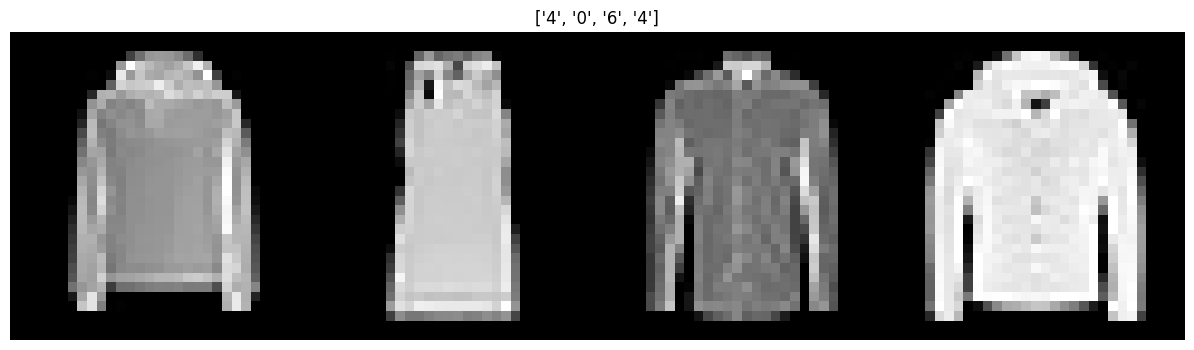

In [12]:
# 8-7 이미지 출력
images, labels = show_batch_images(trainloader)

가장 상위에 표시된 숫자는 클래스(레이블)을 의미한다.

또한 네 개의 이미지가 출력되는 이유는 한 번의 배치에서 네 개의 이미지만 가져오도로고 했기 때문이다.  
이제 모델의 네트워크를 구축해야 한다. 배치 정규화가 적용된 모델과 비교를 위해 배치 정규화가 적용되지 않는 모델을 먼저 생성해본다.

In [15]:
# 코드 8-8 배치 정규화가 적용되지 않는 네트워크
class NormalNet(nn.Module):
    def __init__(self):
        super(NormalNet, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784, 48), # ----- (28, 28) 크기의 이미지로 입력은 784(28 x 28) 크기가 된다.
            nn.ReLU(),
            nn.Linear(48, 24),
            nn.ReLU(),
            nn.Linear(24, 10) # ------ FashionMNIST의 클래스는 총 열 개
        ) # ------ nn.Sequential을 사용하면 forward() 함수에서 계층(layer)별로 가독성 있게 코드 구현이 가능

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x) # -------- nn.Sequential에서 정의한 계층 호출
        return x
